In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Parameters of example nr. 11
f1 = 200
f2 = 200.25
f3 = 199.75
A = 4
fs = 400
N = 2000
k = np.arange(N)


Generating sinusoidal signals

In [10]:
x1 = A * np.sin(2 * np.pi * f1 / fs * k)
x2 = A * np.sin(2 * np.pi * f2 / fs * k)
x3 = A * np.sin(2 * np.pi * f3 / fs * k)

Hann, Flat Top

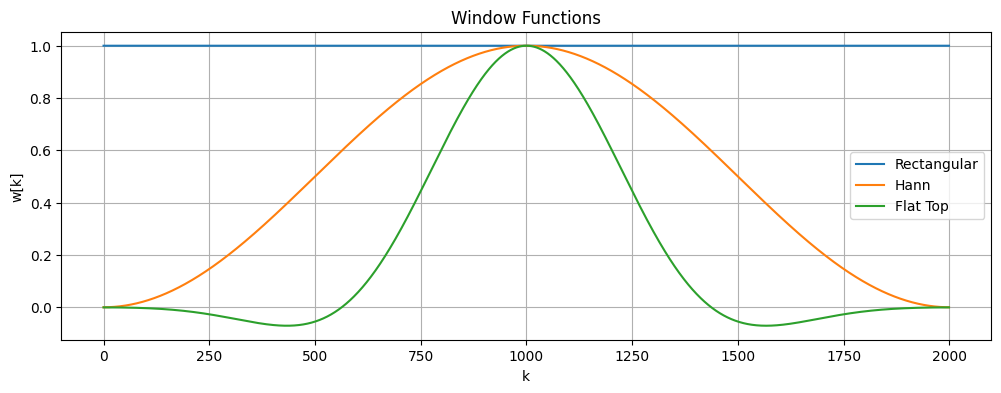

In [11]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

# Wykres okien
plt.figure(figsize=(12, 4))
plt.plot(wrect, label='Rectangular')
plt.plot(whann, label='Hann')
plt.plot(wflattop, label='Flat Top')
plt.title('Window Functions')
plt.xlabel('k')
plt.ylabel('w[k]')
plt.legend()
plt.grid(True)
plt.show()

FFT Normalization

In [12]:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X
    Xtmp[0] *= 0.5
    if N % 2 == 0:
        Xtmp[N//2] *= 0.5
    return 20 * np.log10(np.abs(Xtmp))

df = fs / N
f = np.arange(N) * df

In [13]:
# Zastosowanie okien
X1_wr = fft(x1 * wrect)
X2_wr = fft(x2 * wrect)
X3_wr = fft(x3 * wrect)

X1_wh = fft(x1 * whann)
X2_wh = fft(x2 * whann)
X3_wh = fft(x3 * whann)

X1_wf = fft(x1 * wflattop)
X2_wf = fft(x2 * wflattop)
X3_wf = fft(x3 * wflattop)

DFT (175-225 Hz)

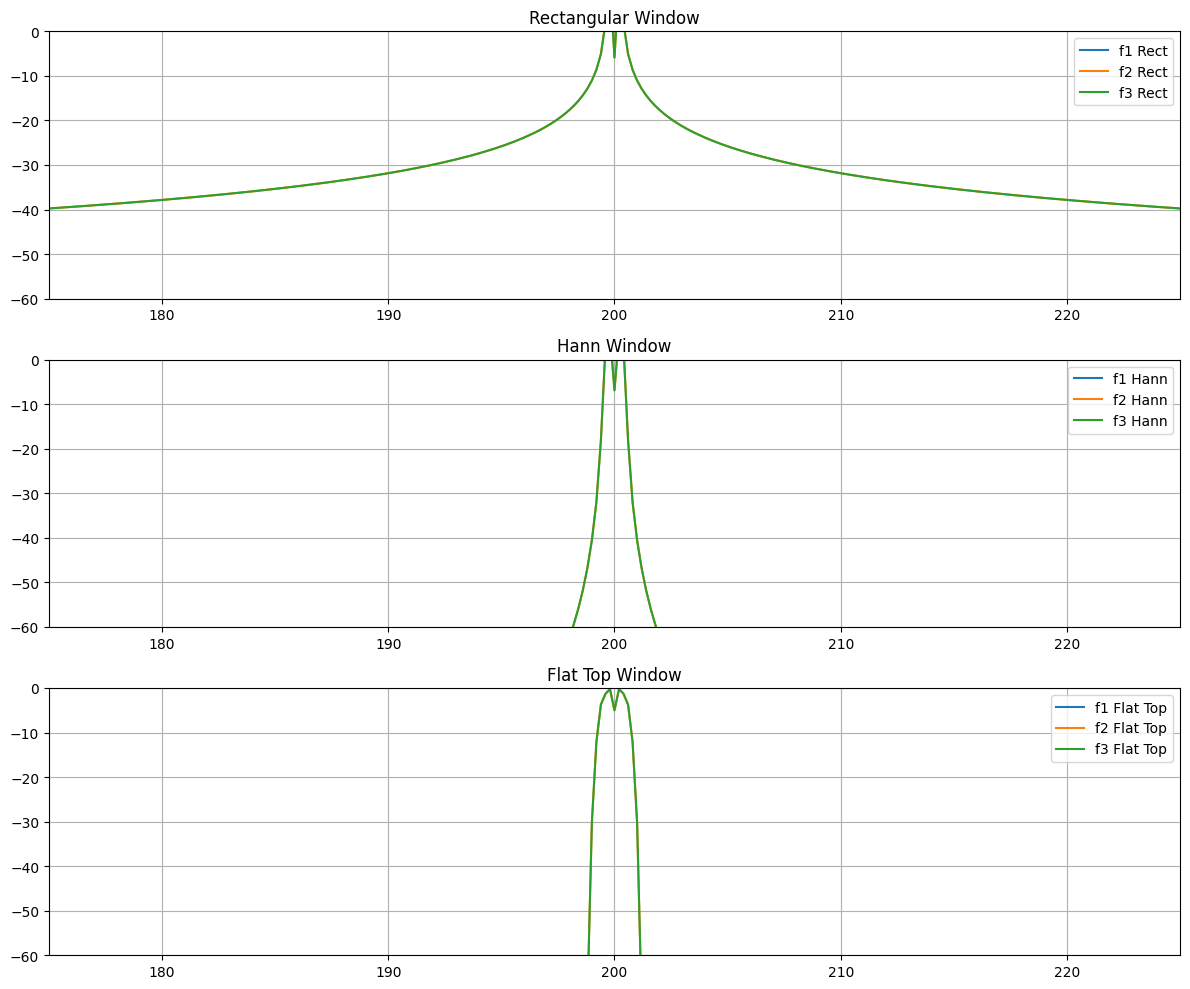

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1_wr), label='f1 Rect')
plt.plot(f, fft2db(X2_wr), label='f2 Rect')
plt.plot(f, fft2db(X3_wr), label='f3 Rect')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.title('Rectangular Window')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1_wh), label='f1 Hann')
plt.plot(f, fft2db(X2_wh), label='f2 Hann')
plt.plot(f, fft2db(X3_wh), label='f3 Hann')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.title('Hann Window')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1_wf), label='f1 Flat Top')
plt.plot(f, fft2db(X2_wf), label='f2 Flat Top')
plt.plot(f, fft2db(X3_wf), label='f3 Flat Top')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.title('Flat Top Window')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\sirwo\AppData\Local\Temp\ipykernel_14476\2301887480.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


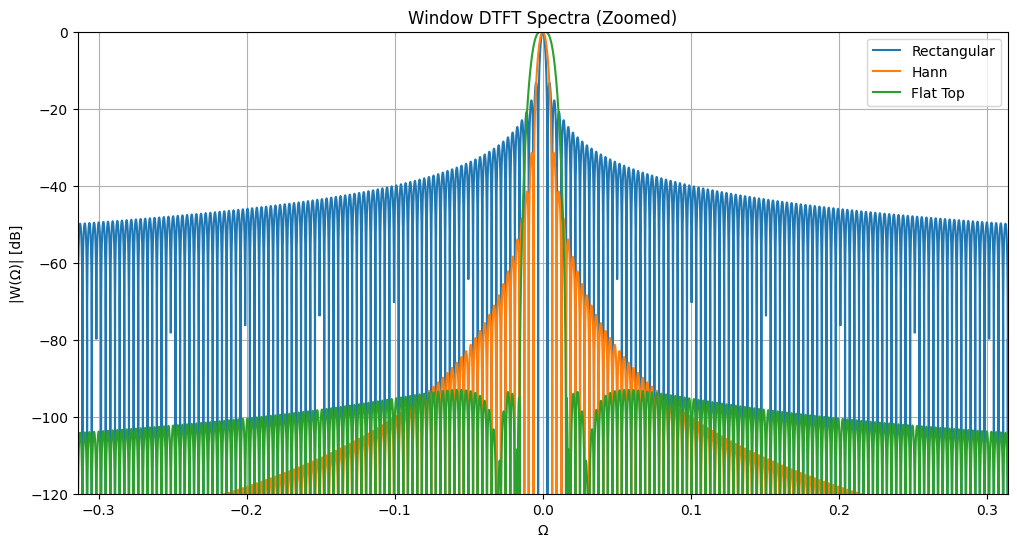

In [15]:
def winDTFTdB(w):
    N = w.size
    Nz = 100 * N
    W = np.zeros(Nz)
    W[:N] = w
    W = np.abs(fftshift(fft(W)))
    W /= np.max(W)
    W = 20 * np.log10(W)
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi
    return Omega, W

Omega, Wrect = winDTFTdB(wrect)
Omega, Whann = winDTFTdB(whann)
Omega, Wflat = winDTFTdB(wflattop)

plt.figure(figsize=(12, 6))
plt.plot(Omega, Wrect, label='Rectangular')
plt.plot(Omega, Whann, label='Hann')
plt.plot(Omega, Wflat, label='Flat Top')
plt.xlim(-np.pi / 10, np.pi / 10)
plt.ylim(-120, 0)
plt.title('Window DTFT Spectra (Zoomed)')
plt.xlabel('Ω')
plt.ylabel('|W(Ω)| [dB]')
plt.grid(True)
plt.legend()
plt.show()